In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score

In [50]:
data = pd.read_csv('/content/invoice_retail_dataset.csv')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
194,536388,21115,ROSE CARAVAN DOORSTOP,4,12/1/2010 9:59,6.75,16250,United Kingdom
195,536388,22469,HEART OF WICKER SMALL,12,12/1/2010 9:59,1.65,16250,United Kingdom
196,536388,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 9:59,1.65,16250,United Kingdom
197,536389,22941,CHRISTMAS LIGHTS 10 REINDEER,6,12/1/2010 10:03,8.50,12431,Australia


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    199 non-null    object 
 1   StockCode    199 non-null    object 
 2   Description  199 non-null    object 
 3   Quantity     199 non-null    int64  
 4   InvoiceDate  199 non-null    object 
 5   UnitPrice    199 non-null    float64
 6   CustomerID   199 non-null    int64  
 7   Country      199 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 12.6+ KB


In [52]:
X = data[['UnitPrice', 'CustomerID']].values
X

array([[2.5500e+00, 1.7850e+04],
       [3.3900e+00, 1.7850e+04],
       [2.7500e+00, 1.7850e+04],
       [3.3900e+00, 1.7850e+04],
       [3.3900e+00, 1.7850e+04],
       [7.6500e+00, 1.7850e+04],
       [4.2500e+00, 1.7850e+04],
       [1.8500e+00, 1.7850e+04],
       [1.8500e+00, 1.7850e+04],
       [1.6900e+00, 1.3047e+04],
       [2.1000e+00, 1.3047e+04],
       [2.1000e+00, 1.3047e+04],
       [3.7500e+00, 1.3047e+04],
       [1.6500e+00, 1.3047e+04],
       [4.2500e+00, 1.3047e+04],
       [4.9500e+00, 1.3047e+04],
       [9.9500e+00, 1.3047e+04],
       [5.9500e+00, 1.3047e+04],
       [5.9500e+00, 1.3047e+04],
       [7.9500e+00, 1.3047e+04],
       [7.9500e+00, 1.3047e+04],
       [4.2500e+00, 1.3047e+04],
       [4.9500e+00, 1.3047e+04],
       [4.9500e+00, 1.3047e+04],
       [4.9500e+00, 1.3047e+04],
       [5.9500e+00, 1.3047e+04],
       [3.7500e+00, 1.2583e+04],
       [3.7500e+00, 1.2583e+04],
       [3.7500e+00, 1.2583e+04],
       [8.5000e-01, 1.2583e+04],
       [6.

In [53]:
X = StandardScaler().fit_transform(X)
X

array([[-0.29177239,  1.14965766],
       [-0.05443578,  1.14965766],
       [-0.23526367,  1.14965766],
       [-0.05443578,  1.14965766],
       [-0.05443578,  1.14965766],
       [ 1.14919987,  1.14965766],
       [ 0.1885517 ,  1.14965766],
       [-0.4895529 ,  1.14965766],
       [-0.4895529 ,  1.14965766],
       [-0.53475987, -1.44969972],
       [-0.418917  , -1.44969972],
       [-0.418917  , -1.44969972],
       [ 0.04727991, -1.44969972],
       [-0.54606161, -1.44969972],
       [ 0.1885517 , -1.44969972],
       [ 0.3863322 , -1.44969972],
       [ 1.7990501 , -1.44969972],
       [ 0.66887578, -1.44969972],
       [ 0.66887578, -1.44969972],
       [ 1.23396294, -1.44969972],
       [ 1.23396294, -1.44969972],
       [ 0.1885517 , -1.44969972],
       [ 0.3863322 , -1.44969972],
       [ 0.3863322 , -1.44969972],
       [ 0.3863322 , -1.44969972],
       [ 0.66887578, -1.44969972],
       [ 0.04727991, -1.70081399],
       [ 0.04727991, -1.70081399],
       [ 0.04727991,

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

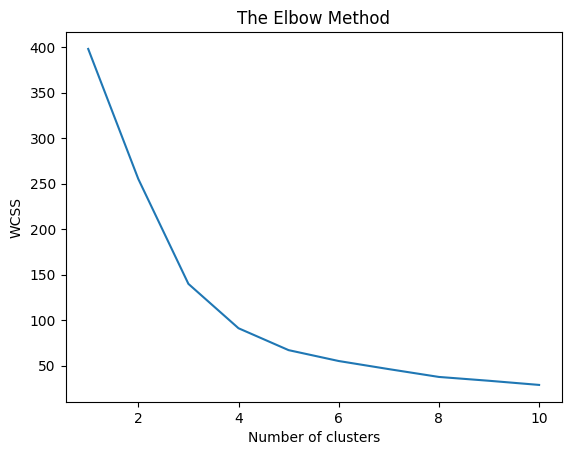

In [54]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


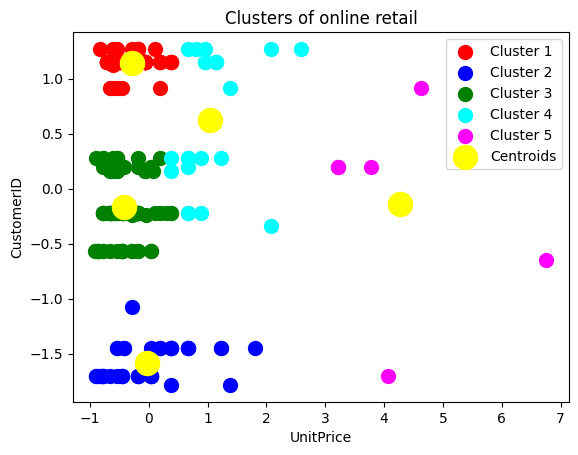

In [56]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of online retail')
plt.xlabel('UnitPrice')
plt.ylabel('CustomerID')
plt.legend()
plt.show()

In [57]:
# Evaluation
#labels = kmeans.labels_
from sklearn.metrics import davies_bouldin_score
w=davies_bouldin_score(X, y_kmeans)
print("Score davies bouldin ")
print(w)

Score davies bouldin 
0.6812433875041444
